<div style="background:rgb(202, 255, 251); color: #003366; font-family: monospace; font-weight: bold; font-size: 220%; text-align: center; border-bottom: 2px solid #3366ff;">
  INTRODUCTION
</div>

<div style="background:rgb(202, 255, 251); color: #003366; font-family: monospace; font-weight: bold; font-size: 220%; text-align: center; border-bottom: 2px solid #3366ff;">
  PROJECT OVERVIEW
</div>

<br> </br>
1. [UNDERSTANDING THE DATASET](#1)
2. [EXPLORATORY DATA ANALYSIS](#2)
3. [DATA PREPROCESSING](#3)
4. [MODEL SELECTION & TRAINING](#4)
5. [MODEL EVALUATION](#5)
6. [HYPERPARAMETER TUNING](#6)
7. [CONCLUSION](#7)


## Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split
from sklearn.utils import resample
from scipy.stats import uniform, randint


<a id="1"></a>
<div style="background:rgb(202, 255, 251); color: #003366; font-family: monospace; font-weight: bold; font-size: 220%; text-align: center; border-bottom: 2px solid #3366ff;">
  1. UNDERSTANDING THE DATASET
</div>

### 1.1 Loading the dataset and exploring its structure

In [2]:
df = pd.read_csv('C:/Users/Forza Motorsport/Desktop/LEARNBAY/1CAPSTONE PROJECT/CREDIT RISK PREDICTION/Capstone Project-20250426T144525Z-001/Credit Risk Prediction.csv')

In [3]:
df.head()

,age,income,loan_amount,credit_score,employment_status,default(y),loan_term,interest_rate,debt_to_income_ratio,num_of_dependents,education_level,home_ownership,marital_status,credit_history_length,num_credit_lines,late_payments,bankruptcies,annual_savings,retirement_savings,monthly_expenses
0,38,71440,27069,689,self-employed,1,36,9.937874,31.046101,0,high_school,rent,married,7,6,1,1,25259,195208,6037
1,36,90200,14895,578,employed,0,48,13.624882,21.845252,0,high_school,own,married,11,16,8,0,40761,152999,4064
2,47,85896,2613,352,employed,1,12,6.676366,12.562405,1,bachelor,mortgage,divorced,24,2,2,0,34857,67487,2848
3,38,20121,3163,622,unemployed,0,48,12.833366,17.144545,1,master,own,married,12,4,6,1,16048,98869,7721
4,44,77529,37731,615,self-employed,0,12,4.111636,35.892430,3,high_school,own,single,27,7,5,0,5668,42397,8009


### 1.2 Checking the datatype and information of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   age                    100000 non-null  int64  
 1   income                 100000 non-null  int64  
 2   loan_amount            100000 non-null  int64  
 3   credit_score           100000 non-null  int64  
 4   employment_status      100000 non-null  object 
 5   default(y)             100000 non-null  int64  
 6   loan_term              100000 non-null  int64  
 7   interest_rate          100000 non-null  float64
 8   debt_to_income_ratio   100000 non-null  float64
 9   num_of_dependents      100000 non-null  int64  
 10  education_level        100000 non-null  object 
 11  home_ownership         100000 non-null  object 
 12  marital_status         100000 non-null  object 
 13  credit_history_length  100000 non-null  int64  
 14  num_credit_lines       100000 non-nul

### 1.3 Checking null values

In [5]:
df.isnull().sum()

age                      0
income                   0
loan_amount              0
credit_score             0
employment_status        0
default(y)               0
loan_term                0
interest_rate            0
debt_to_income_ratio     0
num_of_dependents        0
education_level          0
home_ownership           0
marital_status           0
credit_history_length    0
num_credit_lines         0
late_payments            0
bankruptcies             0
annual_savings           0
retirement_savings       0
monthly_expenses         0
dtype: int64

### 1.4 Checking the count of number of times each unique row appeared in a DataFrame.

In [6]:
df.value_counts()

age  income  loan_amount  credit_score  employment_status  default(y)  loan_term  interest_rate  debt_to_income_ratio  num_of_dependents  education_level  home_ownership  marital_status  credit_history_length  num_credit_lines  late_payments  bankruptcies  annual_savings  retirement_savings  monthly_expenses
21   20007   27530        507           employed           0           36         6.096589       21.577740             0                  master           own             single          21                     13                6              0             20408           164458              7198                1
50   41257   2886         307           employed           0           24         5.399266       31.031014             1                  high_school      own             single          5                      8                 8              0             19309           47965               5864                1
     42084   20313        557           self-employed      0

### 1.5 Checking class balance


In [7]:
class_balance = df['default(y)'].value_counts(normalize = True)
print (class_balance)

default(y)
1    0.50094
0    0.49906
Name: proportion, dtype: float64


### 1.6 Balancing the classes


In [8]:
# Separate classes
minority_class = df[df['default(y)'] == 0]  # Replace with minority class value
majority_class = df[df['default(y)'] == 1]  # Replace with majority class value

# Downsample the majority class
majority_downsampled = resample(majority_class,
                                replace=True,
                                n_samples=len(minority_class),
                                random_state=42)

# Combine and shuffle
df_balanced = pd.concat([majority_downsampled, minority_class])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
df = df_balanced

# Confirm new distribution
print(df['default(y)'].value_counts())


default(y)
0    49906
1    49906
Name: count, dtype: int64


### 1.7 Checking duplicates

In [9]:
df.duplicated().sum()

18272

#### QUESTIONS
#### 1) What are the key features affecting credit risk?
Key features affecting credit risk include 'credit_score', 'loan_amount', 'debt_to_income_ratio', 'late_payments', and 'income'.

#### 2) How is the target variable (default) distributed?
They are almost equally balanced where default (1) = 50094 and default (0) = 49906

#### 3) Are there any missing values or inconsistencies?
There are no null or missing values. Data is almost equally balanced.

<a id="2"></a>
<div style="background:rgb(202, 255, 251); color: #003366; font-family: monospace; font-weight: bold; font-size: 220%; text-align: center; border-bottom: 2px solid #3366ff;">
  2. EXPLORATORY DATA ANALYSIS
</div>

### Visualizing distribution of Numeric Features

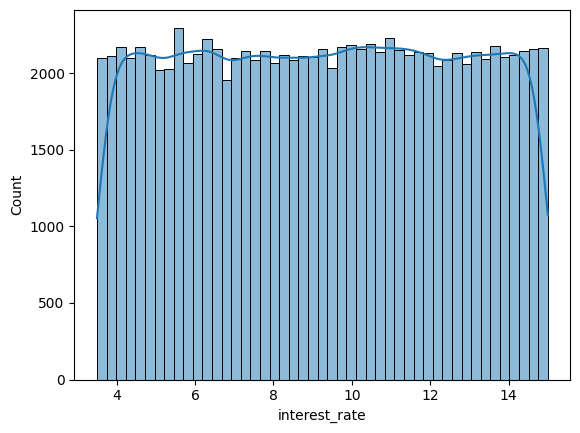

In [10]:
sns.histplot(df['interest_rate'], kde=True)
plt.show()

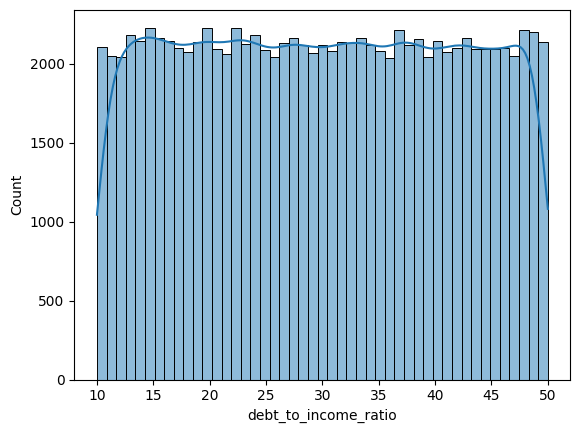

In [11]:
sns.histplot(df['debt_to_income_ratio'], kde=True)
plt.show()

### Analyzing correlation between variables

<Axes: xlabel='credit_score', ylabel='default(y)'>

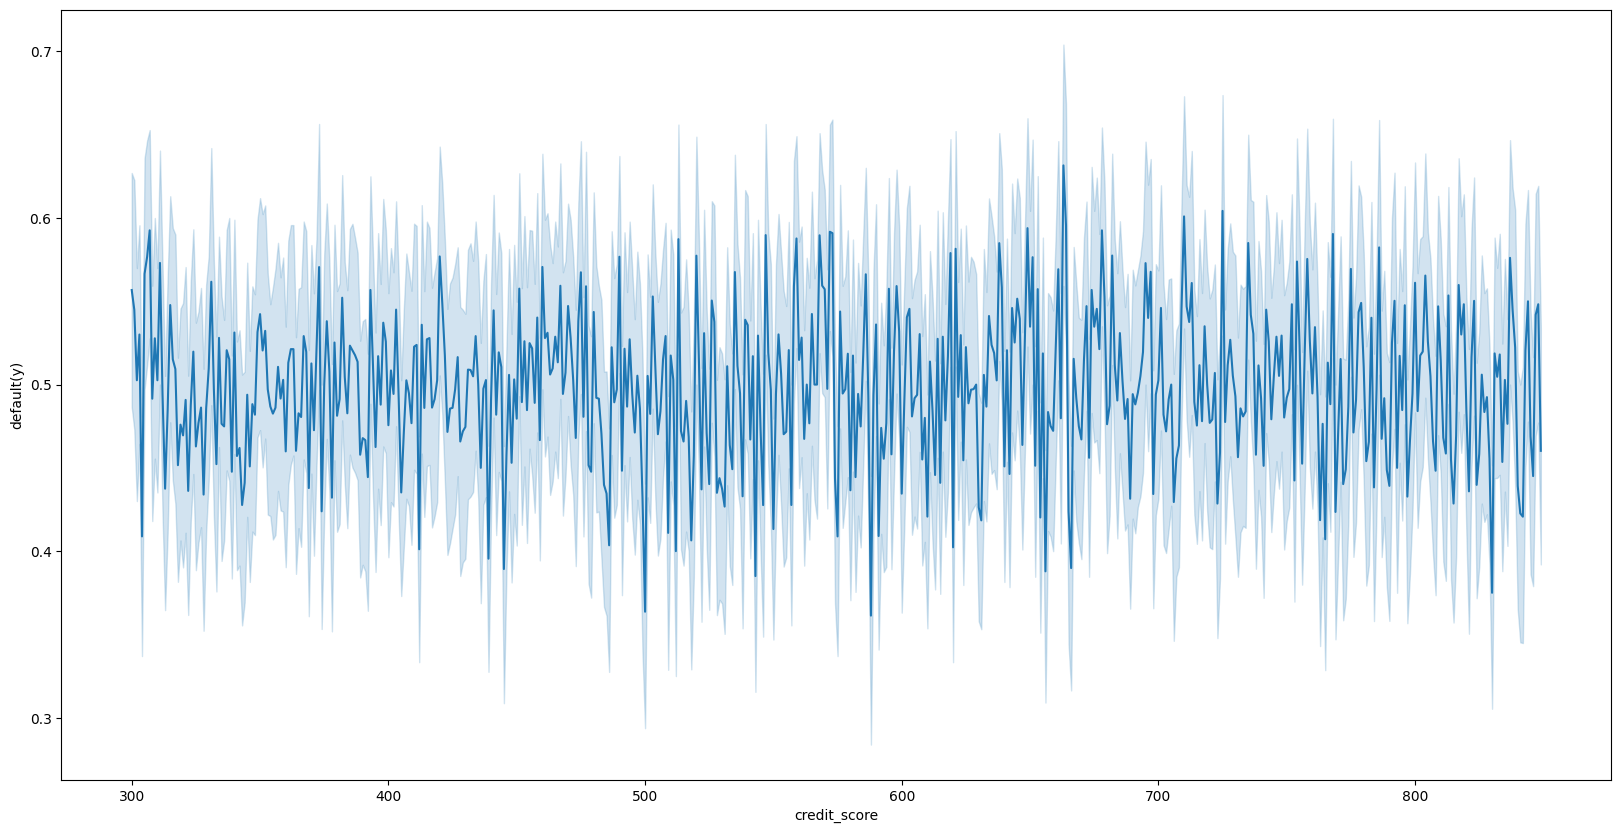

In [12]:
fig, ax = plt.subplots(figsize = (20,10))
sns.lineplot(x = 'credit_score', y = 'default(y)', data = df, ax = ax)


### Comparing default and non-default groups data distribution

In [13]:
df.groupby('default(y)').mean(numeric_only=True)

,age,income,loan_amount,credit_score,loan_term,interest_rate,debt_to_income_ratio,num_of_dependents,credit_history_length,num_credit_lines,late_payments,bankruptcies,annual_savings,retirement_savings,monthly_expenses
default(y),,,,,,,,,,,,,,,
0,42.448944,59916.535186,25505.19667,574.010800,36.169759,9.241521,30.003258,2.003306,14.957500,10.018675,4.493949,0.059031,25284.514147,100629.219974,5253.509418
1,42.516972,60032.107502,25426.23392,574.562057,35.961047,9.276908,29.976579,2.004829,14.982106,9.986815,4.478760,0.060153,25132.110628,100922.463912,5265.828778


### Finding outliers

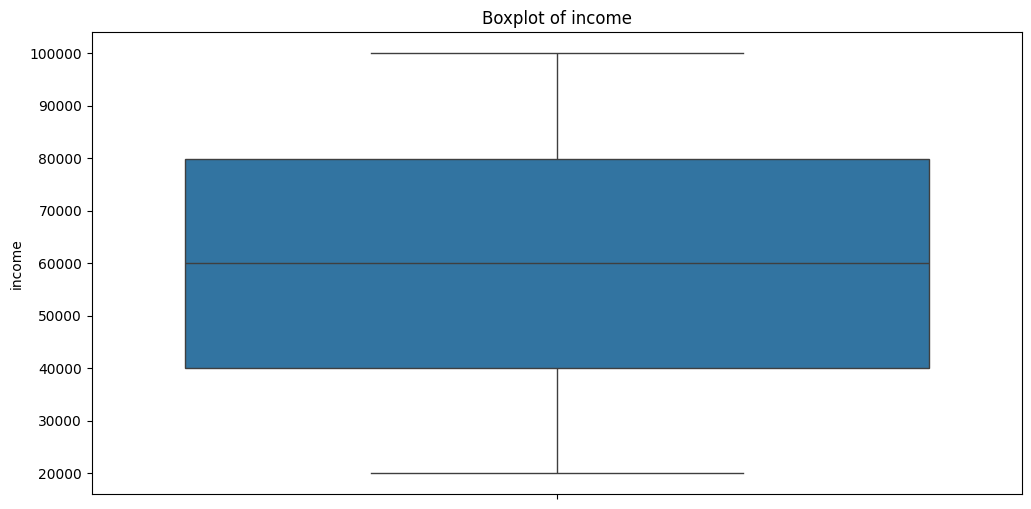

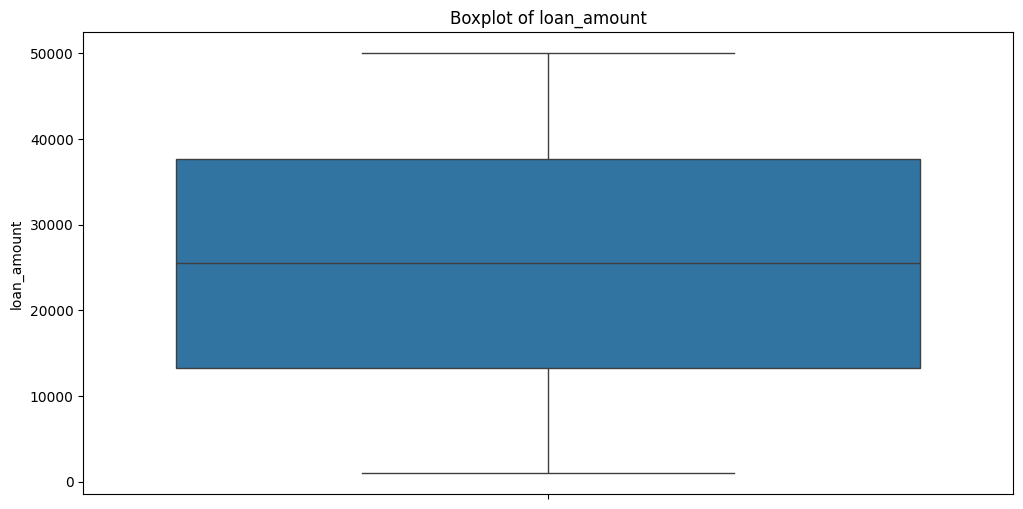

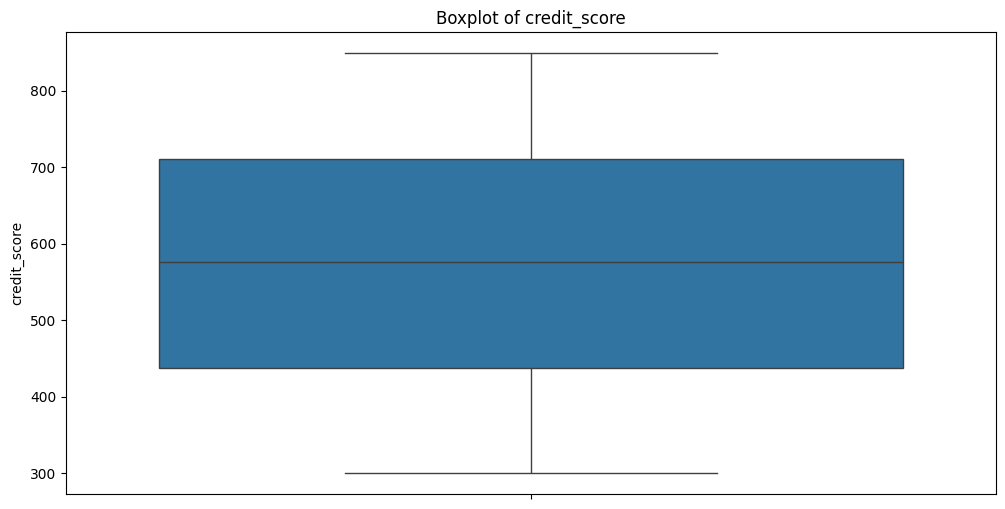

In [14]:
plt.figure(figsize = (12,6))
sns.boxplot (df['income'])
plt.title('Boxplot of income')
plt.show()

plt.figure(figsize = (12,6))
sns.boxplot (df['loan_amount'])
plt.title('Boxplot of loan_amount')
plt.show()

plt.figure(figsize = (12,6))
sns.boxplot (df['credit_score'])
plt.title('Boxplot of credit_score')
plt.show()

#### QUESTIONS
#### 1) Which features show a strong correlation with default?
None of the features show a strong correlation with default (y)

#### 2) Are there significant differences in income or loan amount between defaulters and non-defaulters?
Defaulters have lower incomes and higher loan amounts as compared to non-defaulters

#### 3) Do credit scores impact the likelihood of default?
There is hardly any impact of credit score on defaulters.

<a id="3"></a>
<div style="background:rgb(202, 255, 251); color: #003366; font-family: monospace; font-weight: bold; font-size: 220%; text-align: center; border-bottom: 2px solid #3366ff;">
  3. DATA PREPROCESSING
</div>

### Dataset for numerical statistics

In [15]:
df.describe()

,age,income,loan_amount,credit_score,default(y),loan_term,interest_rate,debt_to_income_ratio,num_of_dependents,credit_history_length,num_credit_lines,late_payments,bankruptcies,annual_savings,retirement_savings,monthly_expenses
count,99812.000000,99812.000000,99812.000000,99812.000000,99812.000000,99812.000000,99812.000000,99812.000000,99812.000000,99812.000000,99812.000000,99812.000000,99812.000000,99812.000000,99812.000000,99812.000000
mean,42.482958,59974.321344,25465.715295,574.286428,0.500000,36.065403,9.259215,29.989918,2.004068,14.969803,10.002745,4.486354,0.059592,25208.312387,100775.841943,5259.669098
std,12.675015,23085.544843,14130.318969,158.453150,0.500003,16.959126,3.320267,11.553961,1.416544,8.364122,5.472284,2.874833,0.276840,14277.479835,57474.447381,2740.282572
min,21.000000,20000.000000,1000.000000,300.000000,0.000000,12.000000,3.500245,10.000275,0.000000,1.000000,1.000000,0.000000,0.000000,501.000000,1002.000000,500.000000
25%,32.000000,39935.000000,13258.000000,437.000000,0.000000,24.000000,6.375504,19.967387,1.000000,8.000000,5.000000,2.000000,0.000000,12832.750000,50979.000000,2879.000000
50%,42.000000,60087.500000,25531.500000,576.000000,0.500000,36.000000,9.277833,29.960665,2.000000,15.000000,10.000000,4.000000,0.000000,25258.500000,100901.000000,5271.000000
75%,53.000000,79898.250000,37679.000000,710.000000,1.000000,48.000000,12.113821,40.016798,3.000000,22.000000,15.000000,7.000000,0.000000,37514.000000,150448.500000,7638.000000
max,64.000000,99998.000000,49999.000000,849.000000,1.000000,60.000000,14.999745,49.999915,4.000000,29.000000,19.000000,9.000000,2.000000,49999.000000,199997.000000,9999.000000


### One-hot encoding
#### For converting categorical variables into numerical format, so that machine learning models can understand and use them. We use 'pd.get_dummies' to create new binary (0 or 1) columns for each category in your original column.

In [16]:
df = pd.get_dummies(df, drop_first= True)

### Normalize numerical features using standardization
### We use standardization to rescale numerical features

In [17]:
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include='number').drop('default(y)', axis=1).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

### Splitting the dataset into training and testing set

In [18]:
x = df.drop('default(y)', axis=1)

y = df['default(y)']

### Model Building (Classification)
### Since we want to predict 'default (y)' so its a classification problem

In [19]:
x_train, x_test, y_train, y_test = train_test_split (x,y,test_size = 0.2, random_state = 42)

#### QUESTIONS
#### 1) How will you handle missing values in categorical and numerical features?
In order to handle missing values we use mean for numerical features and mode for categorical features.

#### 2) Why is it necessary to normalize numerical features?
To ensure all features contribute equally to the model, especially for algorithms like Logistic Regression 

#### 3) What technique would you use to convert categorical variables to numerical?
To convert categorical variables to numerical form I would use 'One-Hot Encoding'.

<a id="4"></a>
<div style="background:rgb(202, 255, 251); color: #003366; font-family: monospace; font-weight: bold; font-size: 220%; text-align: center; border-bottom: 2px solid #3366ff;">
  4. MODEL SELECTION & TRAINING
</div>



### Training a Logistic Regression model.

In [20]:
log_model = LogisticRegression()
log_model.fit(x_train, y_train)
log_preds = log_model.predict(x_test)

print(f"Accuracy : {accuracy_score(y_test, log_preds):.2f}")
print(f"Precision: {precision_score(y_test, log_preds):.2f}")
print(f"Recall   : {recall_score(y_test, log_preds):.2f}")
print(f"F1-score : {f1_score(y_test, log_preds):.2f}")

Accuracy : 0.51
Precision: 0.51
Recall   : 0.51
F1-score : 0.51


### Decision Tree

In [21]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
tree_preds = tree.predict(x_test)

print(f"Accuracy : {accuracy_score(y_test, tree_preds):.2f}")
print(f"Precision: {precision_score(y_test, tree_preds):.2f}")
print(f"Recall   : {recall_score(y_test, tree_preds):.2f}")
print(f"F1-score : {f1_score(y_test, tree_preds):.2f}")

Accuracy : 0.66
Precision: 0.64
Recall   : 0.73
F1-score : 0.68


### Random Forest

In [22]:
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
forest_preds = forest.predict(x_test)

print(f"Accuracy : {accuracy_score(y_test, forest_preds):.2f}")
print(f"Precision: {precision_score(y_test, forest_preds):.2f}")
print(f"Recall   : {recall_score(y_test, forest_preds):.2f}")
print(f"F1-score : {f1_score(y_test, forest_preds):.2f}")

Accuracy : 0.74
Precision: 0.82
Recall   : 0.61
F1-score : 0.70


### Gradient Boosting

In [23]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
gb_preds = gb.predict(x_test)

print(f"Accuracy : {accuracy_score(y_test, gb_preds):.2f}")
print(f"Precision: {precision_score(y_test, gb_preds):.2f}")
print(f"Recall   : {recall_score(y_test, gb_preds):.2f}")
print(f"F1-score : {f1_score(y_test, gb_preds):.2f}")

Accuracy : 0.52
Precision: 0.52
Recall   : 0.48
F1-score : 0.50


### Comparing models based on accuracy, precision, recall, and F1-score

In [24]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name}")
    print(f"Accuracy : {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred):.2f}")
    print(f"Recall   : {recall_score(y_true, y_pred):.2f}")
    print(f"F1-score : {f1_score(y_true, y_pred):.2f}")


evaluate_model("Logistic Regression", y_test, log_preds)
evaluate_model("Decision Tree", y_test, tree_preds)
evaluate_model("Random Forest", y_test, forest_preds)
evaluate_model("Gradient Boosting", y_test, gb_preds)



Logistic Regression
Accuracy : 0.51
Precision: 0.51
Recall   : 0.51
F1-score : 0.51

Decision Tree
Accuracy : 0.66
Precision: 0.64
Recall   : 0.73
F1-score : 0.68

Random Forest
Accuracy : 0.74
Precision: 0.82
Recall   : 0.61
F1-score : 0.70

Gradient Boosting
Accuracy : 0.52
Precision: 0.52
Recall   : 0.48
F1-score : 0.50


#### QUESTIONS
#### 1) What is the advantage of using a Logistic Regression model as a baseline?
It's simple, interpretable, fast to train, and gives a good benchmark to compare more complex models.

#### 2) Which model performs best, and why?
All models performed equally with accuray score of around 50%

#### 3) What are the potential weaknesses of Decision Trees compared to Random Forest?
Decision Trees tend to overfit and they are sensitive to small changes in data. Random Forest overcomes this by averaging many trees, reducing variance and improving generalization.

<a id="5"></a>
<div style="background:rgb(202, 255, 251); color: #003366; font-family: monospace; font-weight: bold; font-size: 220%; text-align: center; border-bottom: 2px solid #3366ff;">
  5. MODEL EVALUATION
</div>

### Confusion matrix to analyze false positives and false negatives.

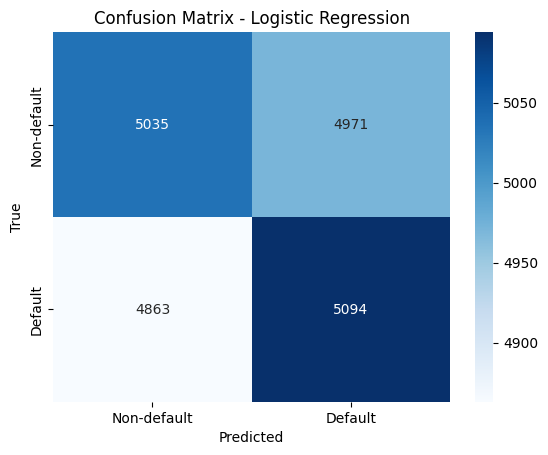

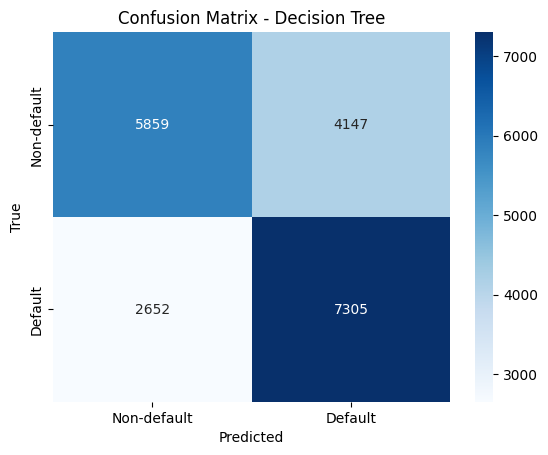

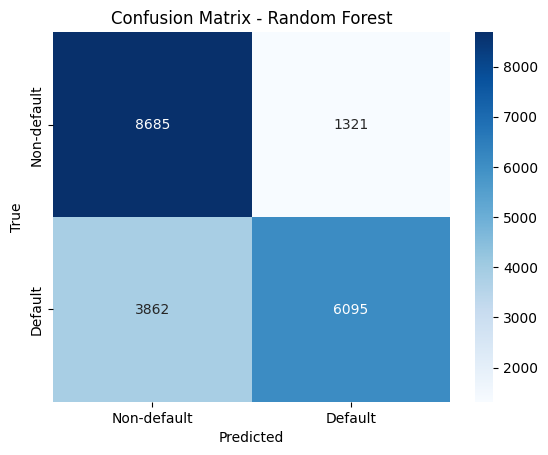

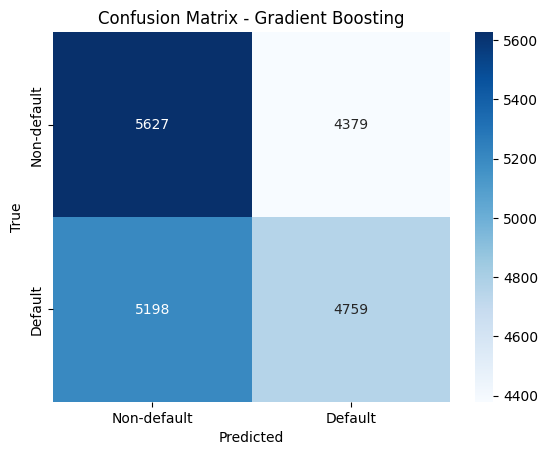

In [25]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-default", "Default"], yticklabels=["Non-default", "Default"])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(y_test, log_preds, "Logistic Regression")
plot_confusion_matrix(y_test, tree_preds, "Decision Tree")
plot_confusion_matrix(y_test, forest_preds, "Random Forest")
plot_confusion_matrix(y_test, gb_preds, "Gradient Boosting")

### ROC-AUC to measure model performance

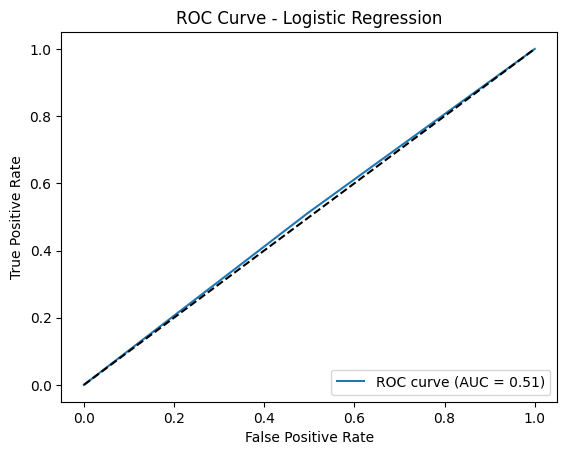

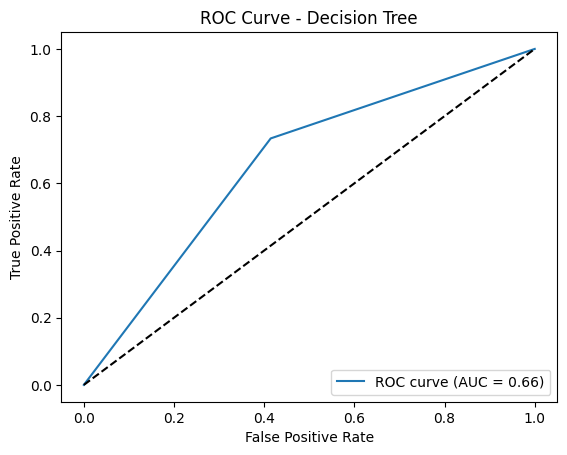

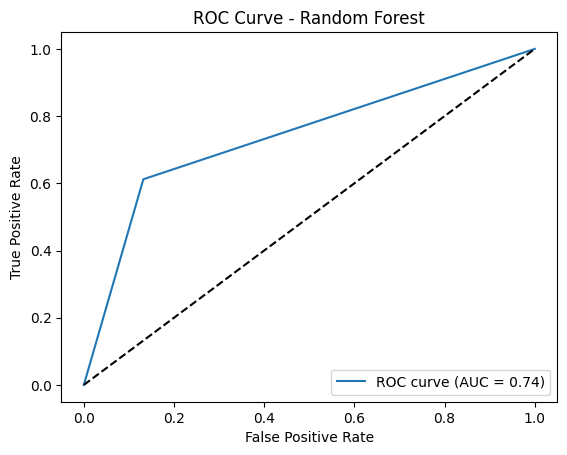

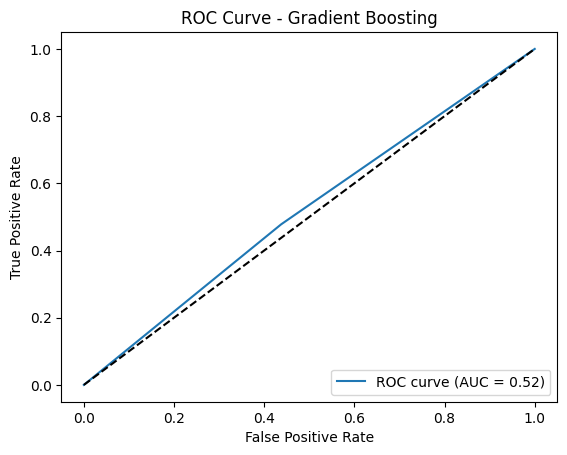

In [26]:
def plot_roc_curve(y_true, y_pred, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"ROC Curve - {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC curves for each model
plot_roc_curve(y_test, log_preds, "Logistic Regression")
plot_roc_curve(y_test, tree_preds, "Decision Tree")
plot_roc_curve(y_test, forest_preds, "Random Forest")
plot_roc_curve(y_test, gb_preds, "Gradient Boosting")

#### QUESTIONS

#### 1) Why is precision-recall more important than accuracy for this dataset?
Because classes are balanced but costs of wrong predictions differ especially missing high-risk (default) cases.

#### 2) How does the confusion matrix help in assessing model performance? 
It breaks down predictions into TP, FP, TN, FN helping you analyze errors and focus on metrics like precision, recall, and F1.

#### 3) What does a high false negative rate indicate in credit risk prediction?
It means that model will not be able to predict the defaulters. This could lead to a financial loss.

<a id="6"></a>
<div style="background:rgb(202, 255, 251); color: #003366; font-family: monospace; font-weight: bold; font-size: 220%; text-align: center; border-bottom: 2px solid #3366ff;">
  6. HYPERPARAMETER TUNING
</div>

### 5.2 Using GridSearchCV for Random Forest Classifier to fine tune hyperparameters for the best model

In [27]:
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Grid Search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Best model
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


### Implementing Cross-Validation

In [28]:
scores = cross_val_score(RandomForestClassifier(), x_train, y_train, cv=5, scoring='f1')
print("F1-scores across folds:", scores)
print("Average F1-score:", scores.mean())

F1-scores across folds: [0.65180103 0.63928777 0.65555161 0.64545195 0.65081298]
Average F1-score: 0.6485810665904069


### Comparing Results

In [29]:
y_pred_tuned = best_rf.predict(x_test)

# Compare to previous model
print("Before Tuning:")
print(classification_report(y_test, forest_preds))

print("\nAfter Tuning:")
print(classification_report(y_test, y_pred_tuned))

Before Tuning:
              precision    recall  f1-score   support

           0       0.69      0.87      0.77     10006
           1       0.82      0.61      0.70      9957

    accuracy                           0.74     19963
   macro avg       0.76      0.74      0.74     19963
weighted avg       0.76      0.74      0.74     19963


After Tuning:
              precision    recall  f1-score   support

           0       0.69      0.89      0.78     10006
           1       0.84      0.60      0.70      9957

    accuracy                           0.74     19963
   macro avg       0.77      0.74      0.74     19963
weighted avg       0.77      0.74      0.74     19963



#### QUESTIONS

#### 1) What are the key hyperparameters to tune in a Random Forest model?
'n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'max_features' and 'bootstrap' are the key parameters to tune in Random Forest.

#### 2) Why is cross-validation important?
It helps assess model performance by reducing overfitting and ensuring the model generalizes well to unseen data.

#### 3) Did tuning significantly improve model performance?
There is no such improvement in the model after hyperparameter tuning as the accuracy is still around 50%.

<a id="7"></a>
<div style="background:rgb(202, 255, 251); color: #003366; font-family: monospace; font-weight: bold; font-size: 220%; text-align: center; border-bottom: 2px solid #3366ff;">
  7. CONCLUSION
</div>

### 1) Summarize the most important findings from your analysis.
The dataset is balanced and no null values were found. Also no outliers were present while plotting boxplot. 
We split the data into 80% training and 20% testing and trained Logistic Regression model as a baseline. We also compared the Decision Tree, Random Forest, and Gradient Boosting models accuracy score and it came out around 50%. So we optimized the model with Hyperparameter tuning and implemnted Corss-Validation and it hardly made any difference to the accuracy score of the model.

### 2) Identify the best model for predicting loan defaults.
All the models performed equally with accuracy of around 50%.

### 3) Discuss the real-world applications of your project.
With the help of this model, we can predict whether a borrower will be able to repay loans or not by analayzing the features such as 'credit_score', 'loan_amount', 'debt_to_income_ratio', 'late_payments', and 'income'.